### **Principle Landmarks**

I took 20 photos for the Berlin Cathedral (Berlin Dom) from 10am to 19pm. 

1. Processes all photos down to a size not exceeding 512 pixels in either width or height

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# this part of the code is adapted from Pre-class work for session 7
# create paths for all images
images = glob('images/*')

flattened = []
# for each image path
for path in images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [300, 200])
            # flatten the matrix to an array and append it to all flattened images
            flattened.append(np.array(cover).flatten())
            

# Flatten it once more
flattened = np.asarray(flattened)

# Use np.stack to put the data into the right dimension
X1 = np.stack(i for i in flattened)

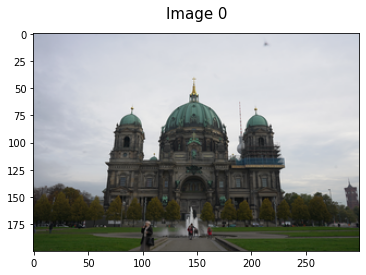

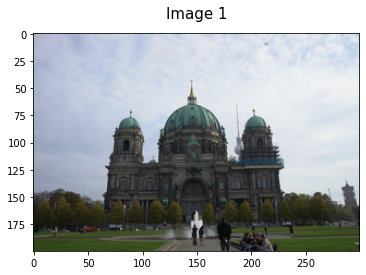

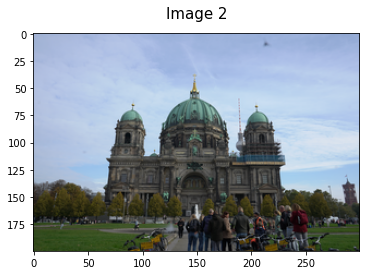

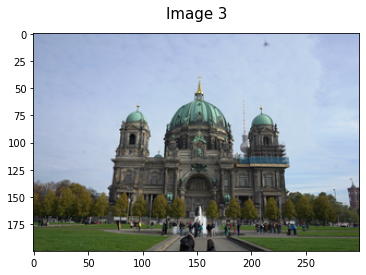

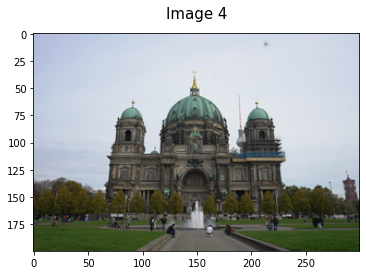

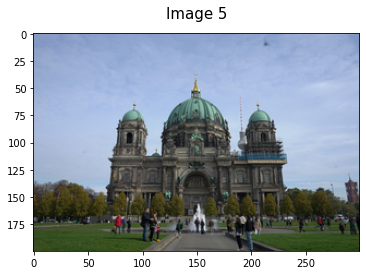

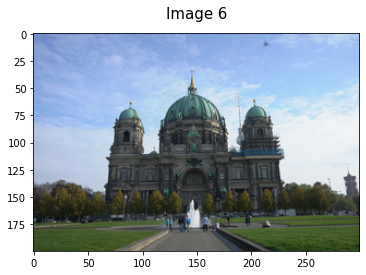

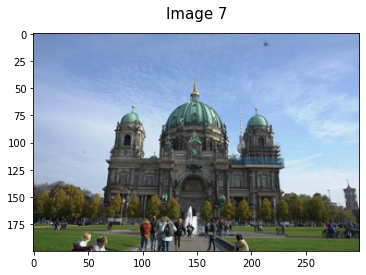

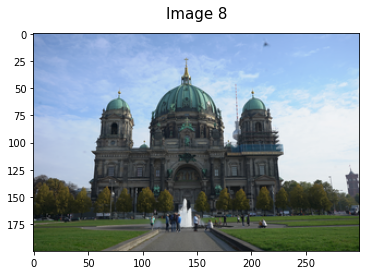

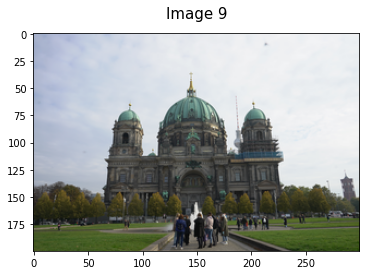

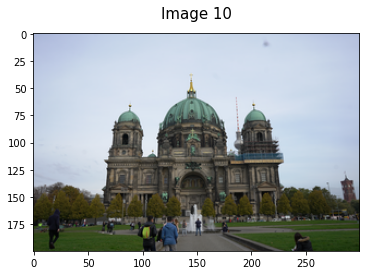

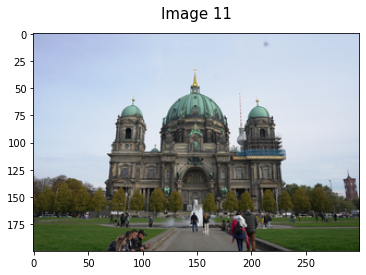

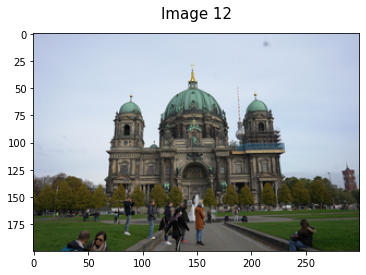

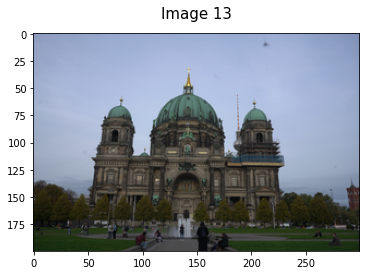

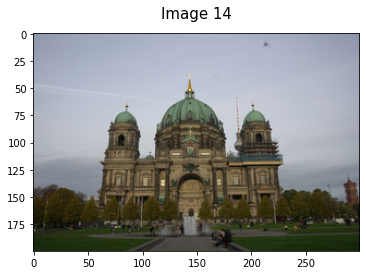

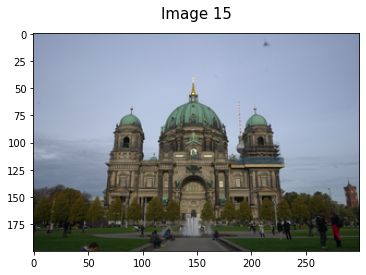

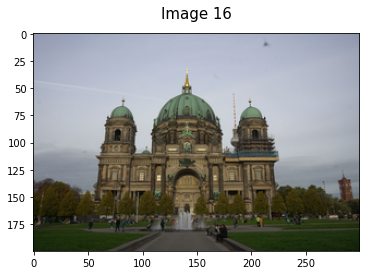

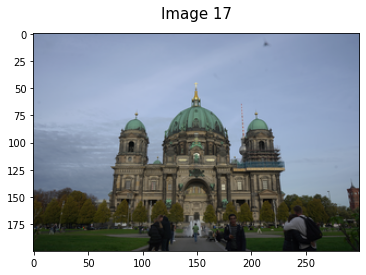

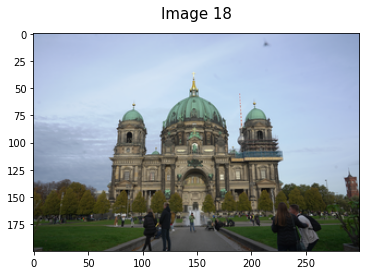

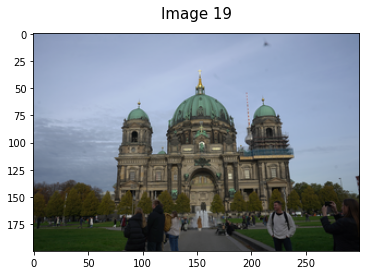

In [5]:
# display the resized images
for i in range(20):
    test_image = X1[i].reshape([200,300,3])
    plt.imshow(test_image, cmap='gray_r')
    plt.title('Image '+str(i), fontsize=15, pad=15)
    plt.show()

In [6]:
# Because the pixel values of each image are ranging from 0 to 255 
# (similar scale), there's no need for feature scaling

Using principal components analysis (PCA) project your images down to a 2 dimensional representation

Text(0, 0.5, 'Explained variance')

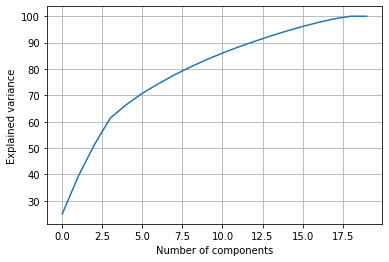

In [7]:
# Use 20 components first to see how much variance can be explained
pca_20 = PCA(n_components=20)
pca_20.fit(X1)

plt.grid()
plt.plot(np.cumsum(pca_20.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [8]:
np.cumsum(pca_20.explained_variance_ratio_ * 100)

array([ 25.01472834,  39.32728535,  51.25029529,  61.40052151,
        66.46514255,  70.77934766,  74.40750936,  77.75683982,
        80.76050104,  83.49698329,  86.03497847,  88.34928898,
        90.46683242,  92.4993855 ,  94.38599383,  96.1137658 ,
        97.68581119,  99.041468  , 100.        , 100.        ])

In [9]:
# use two components
pca_2 = PCA(n_components=2)
# transform into two dimensional
pca_2_reduced = pca_2.fit_transform(X1)

Visually inspect the 2D locations of each photo in the new space

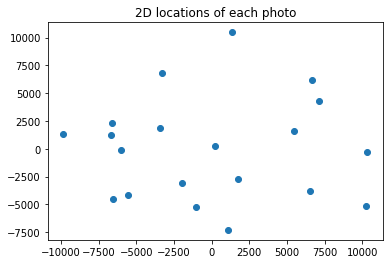

In [10]:
plt.scatter(pca_2_reduced[:, 0], pca_2_reduced[:, 1])
plt.title('2D locations of each photo')
plt.show()

Show the reconstruction from each low-dimensional representation

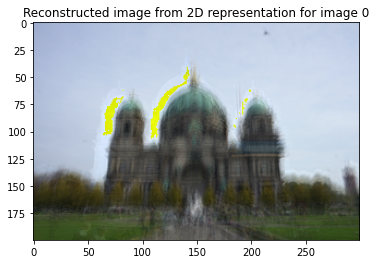

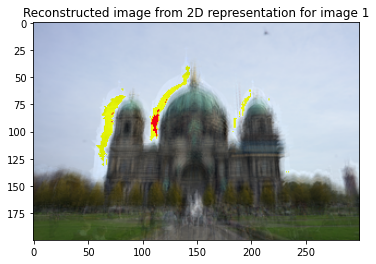

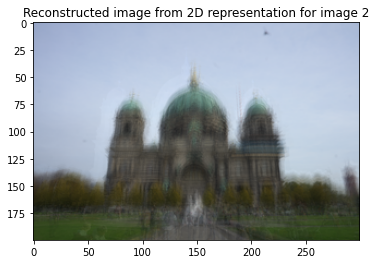

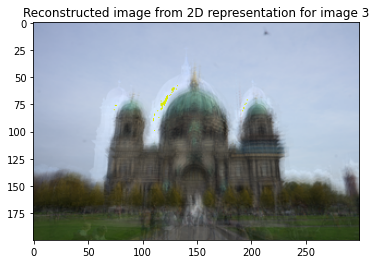

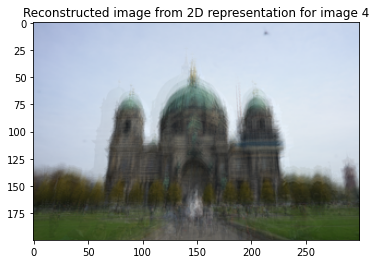

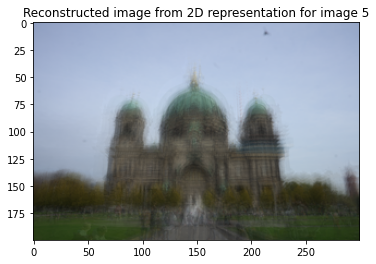

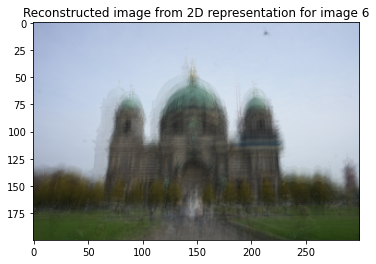

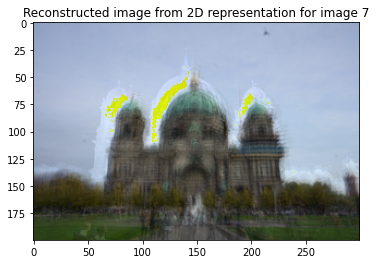

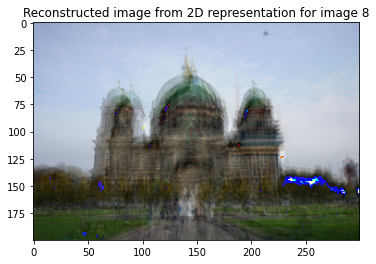

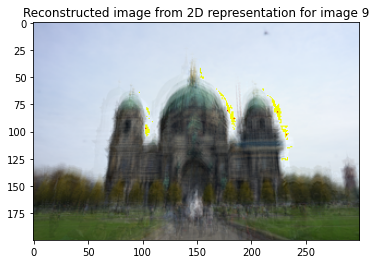

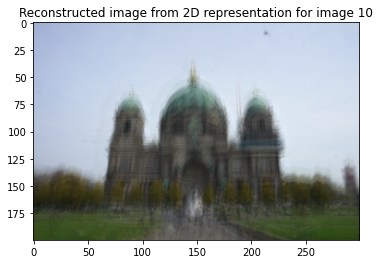

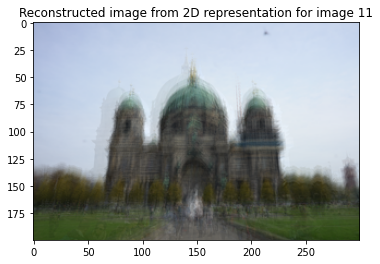

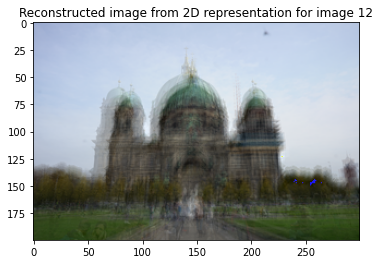

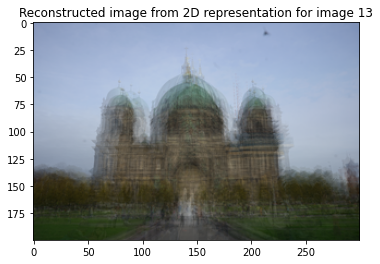

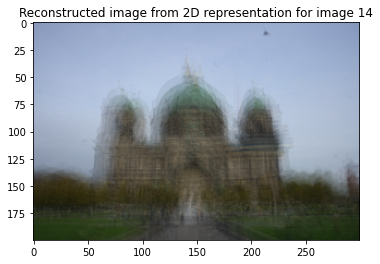

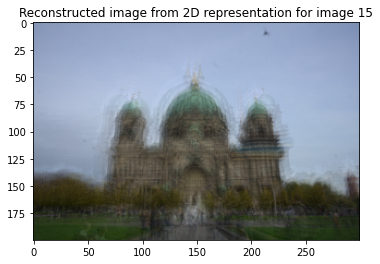

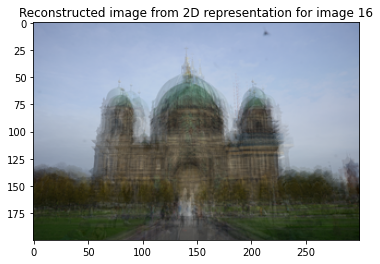

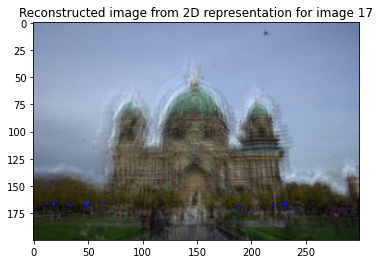

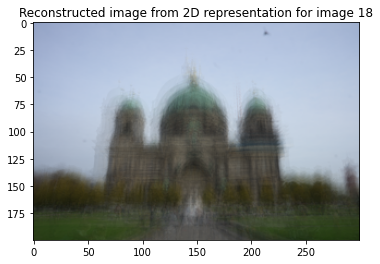

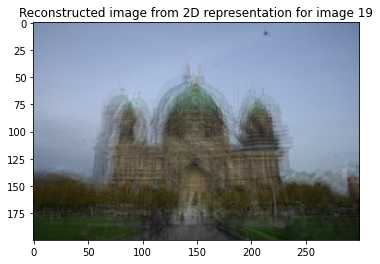

In [11]:
# reconstruct based on the 2D representation
def reconstruction(pca_2_reduced):
    pca_2_recovered = pca_2.inverse_transform(pca_2_reduced)
    for i in range(len(pca_2_reduced)):
        image_pca_2 = pca_2_recovered[i,:].reshape([200,300,3])
        plt.imshow((image_pca_2).astype(np.uint8), cmap='gray_r')
        plt.title('Reconstructed image from 2D representation for image '+str(i))
        plt.show()
        
reconstruction(pca_2_reduced)

Pick a point that is far away from any known location and plot its reconstruction
To better see the variations, I chose two sets of three points with constant x & varying y, and constant y & varying x

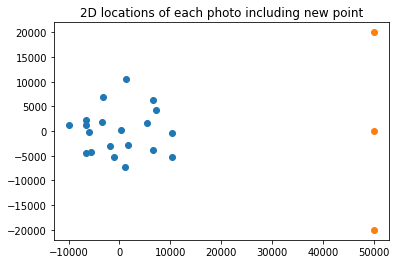

In [12]:
test = np.array([[50000, -20000],[50000, 0],[50000, 20000]])
plt.scatter(pca_2_reduced[:, 0], pca_2_reduced[:, 1])
plt.scatter(test[:, 0], test[:, 1])
plt.title('2D locations of each photo including new point')
plt.show()

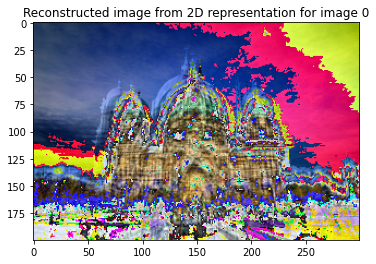

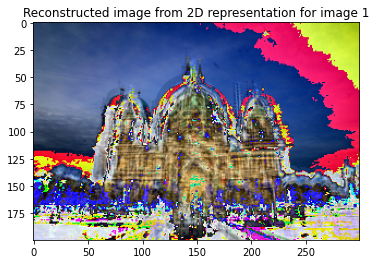

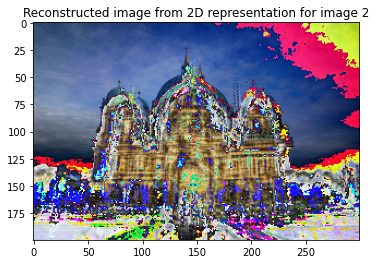

In [13]:
reconstruction(test)

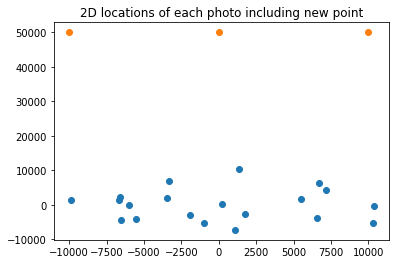

In [14]:
test2 = np.array([[-10000, 50000],[0, 50000], [10000, 50000]])
plt.scatter(pca_2_reduced[:, 0], pca_2_reduced[:, 1])
plt.scatter(test2[:, 0], test2[:, 1])
plt.title('2D locations of each photo including new point')
plt.show()

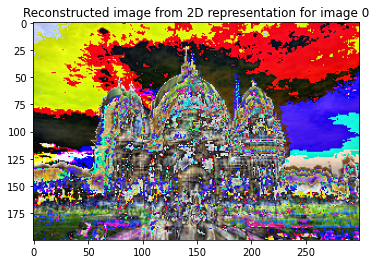

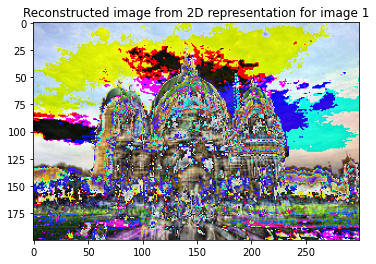

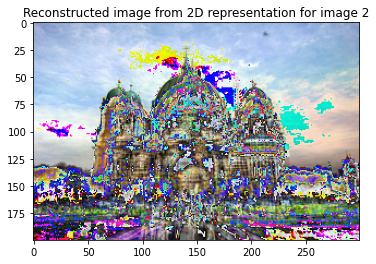

In [15]:
reconstruction(test2)

**Findings**

Using Principle Component Analysis, we reduced the dimensionality of the data while keeping as much variability of the data as possible. The variables are transformed so that they are as linearly uncorrelated as possible. Because the pixel points are all from 0 to 255, there's no need for feature scaling.

In this particular case, PCA is used to compress the image.
We first resize the image into 300 * 200 pixels. The shape of the dataset for a single image is 300 * 200 * 3 (representing RGBs). 
Conducting PCA on the dataset and examining the correlation between variance and components, we find that with 2 components (the two components with the largest eigenvalue), 39.33% of the variance in the dataset can be explained, and it can be fully explained with 19 components.

Representing the 2D locations in a scatterplot, we can see that similar images are more likely to be close to each other. 
After reconstructing the images based on low-dimensional representation, we can see that the images are less clearer but we can still recognize the Berlin Dome. It's also blurry on the outline because the dome is not exactly at the same position for each photo and that information is not well incorporated in the low-dimensional representation. There is also some false information on color which is not well-represented. But it's useful in terms of reducing noise - random people in front of the Cathedral are discarded because they vary from image to image. It's also more efficient in terms of time and memory usage.

Choosing a datapoint far away from the existing one and reconstructing the image, we can see that the outline of Berlin Dome is still well-characterized, meaning that the components retains the most salient information. Keeping one location constant and varying the other, we can see that x and y axis provides different information, one focuses more on contrast in the sky while the other focuses more on the characterization of the Cathedral itself.

Try 3-dimension and compare with 2D results

In [16]:
# use two components
pca_3 = PCA(n_components=3)
# transform into two dimensional
pca_3_reduced = pca_3.fit_transform(X1)

/Users/tianhui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


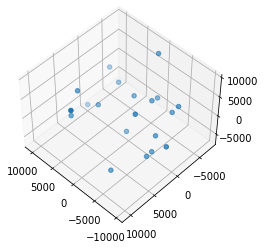

In [17]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(pca_3_reduced[:, 0], pca_3_reduced[:, 1], pca_3_reduced[:, 2])
plt.show()

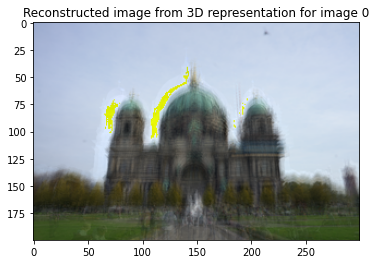

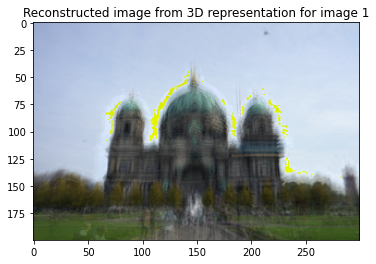

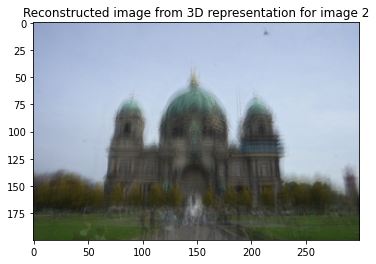

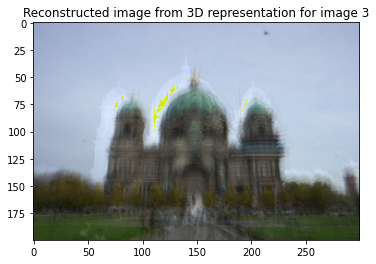

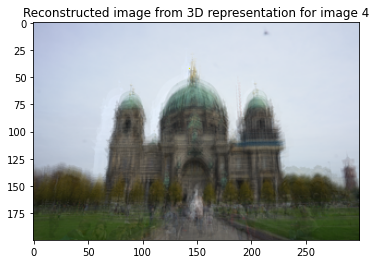

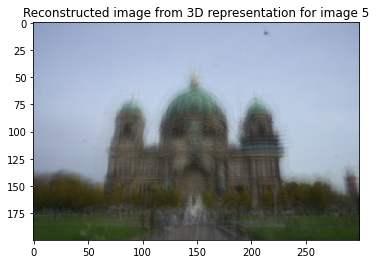

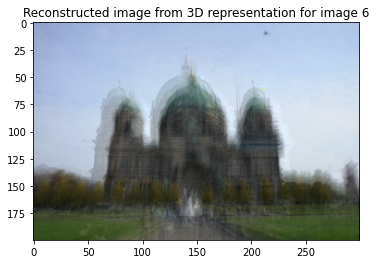

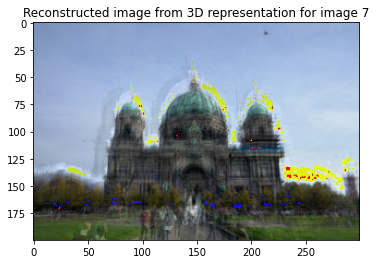

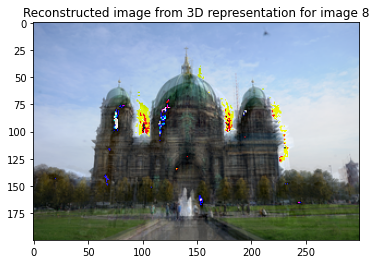

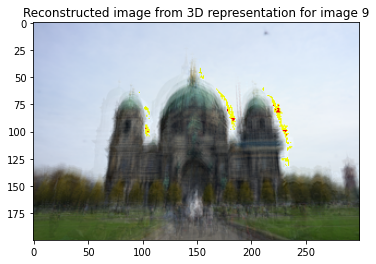

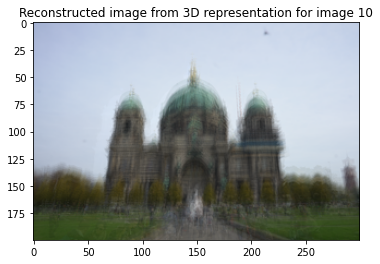

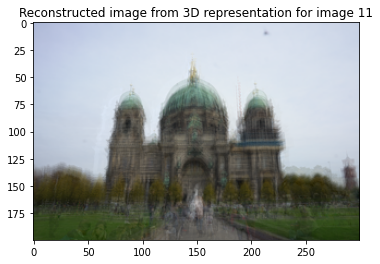

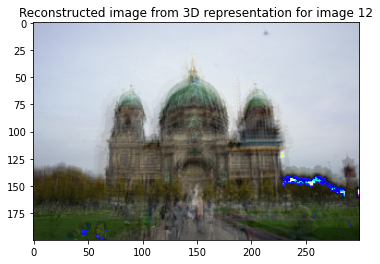

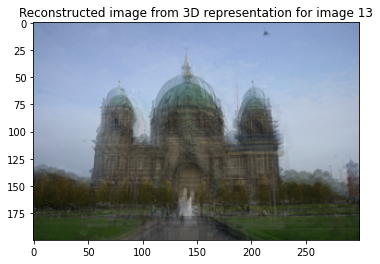

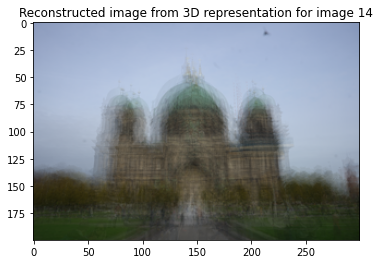

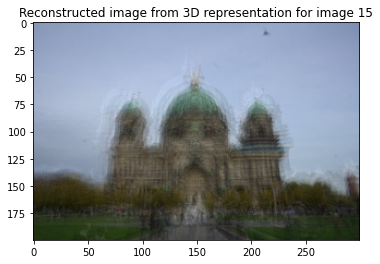

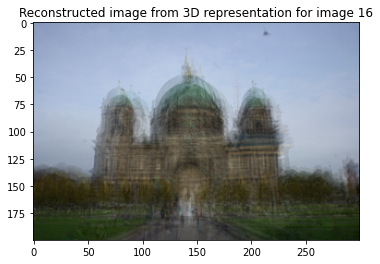

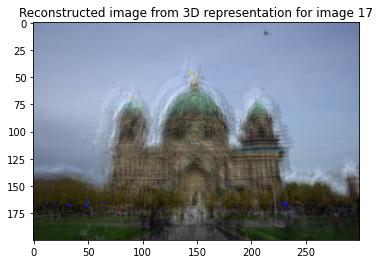

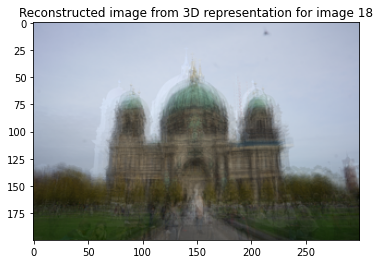

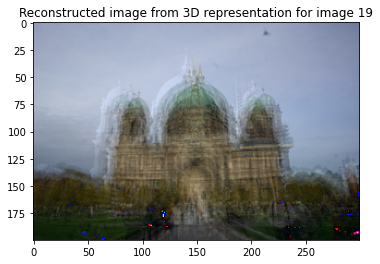

In [18]:
# reconstruct based on the 3D representation
pca_3_recovered = pca_3.inverse_transform(pca_3_reduced)
for i in range(20):
    image_pca_3 = pca_3_recovered[i,:].reshape([200,300,3])
    plt.imshow((image_pca_3).astype(np.uint8), cmap='gray_r')
    plt.title('Reconstructed image from 3D representation for image '+str(i))
    plt.show()